# GSE165388
## 06_supervised_annotation
---

In [1]:
import glob
import os
from typing import NamedTuple, Dict, List, Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyreadr as pr
import seaborn as sns

from sklearn.metrics import confusion_matrix
from tqdm.notebook import tqdm

In [2]:
class Config(NamedTuple):
    files: List[str] = glob.glob("../data/gse165388_annot/*umap.rds")
    labels: List[pd.core.frame.DataFrame] = [
        pd.read_csv(
            v, 
            index_col=0
        ).sort_values("annot") for v in glob.glob("../data/gse165388_annot/*_clusters.csv")
    ]
    pred: List[pd.core.frame.DataFrame] = [
        pd.read_csv(
            v, 
            index_col=0
        ).sort_values("annot") for v in glob.glob("../data/gse165388_annot/*_clusters_gbdt.csv")
    ]
    save_dir: str = "../out/gse165388/06_supervised_annotation"
    fig_kwarg: Dict[str, Union[str, int, float]] = {
        'facecolor': 'white',
        'dpi': 300,
        'bbox_inches': 'tight',
        'pad_inches': 0.05
    }
    save_file: bool = False
    
conf = Config(save_file=True)

In [3]:
os.makedirs(conf.save_dir, exist_ok=True)

In [4]:
l_data = [pr.read_r(v)[None] for v in conf.files]
l_id = [v.split("umap")[0].split("/")[-1] for v in conf.files]

In [10]:
l_labels = [df.annot for df in conf.pred]

In [11]:
l_center = [df.assign(label=label).groupby("label").median() for df, label in zip(l_data, l_labels)]

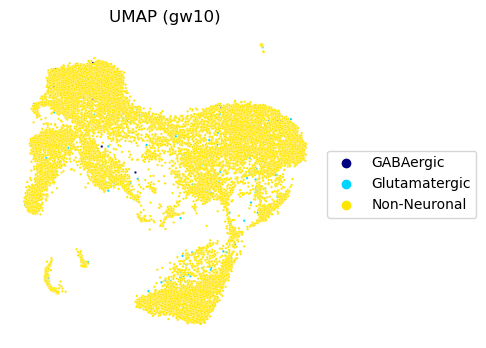

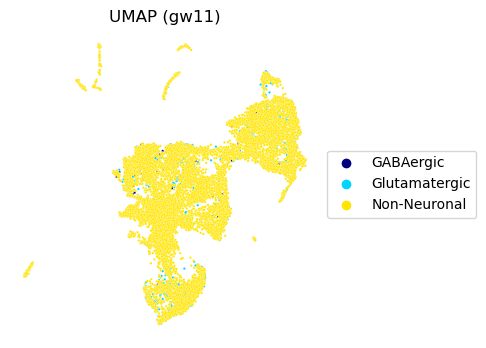

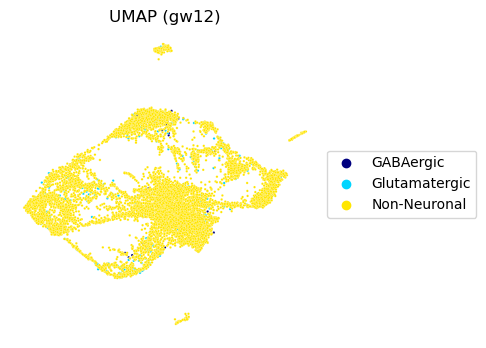

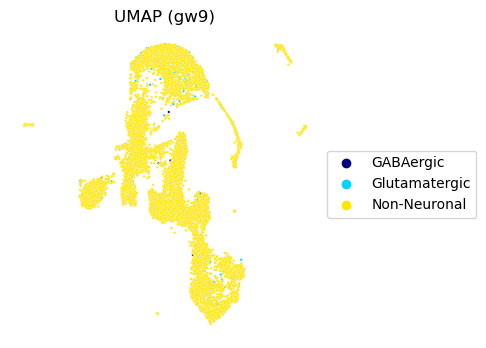

In [13]:
for data, label, center, sample_id in zip(l_data, l_labels, l_center, l_id):

    fig, ax = plt.subplots(figsize=(4, 4))

    sns.scatterplot(
        data=data.loc[label.index, :], x="UMAP_1", y="UMAP_2", hue=label,
        s=3, 
        palette=[plt.cm.jet(i/len(label.unique())) for i in range(len(label.unique()))]
    )

    ax.set(title=f"UMAP ({sample_id})")
    ax.legend(bbox_to_anchor=(1, .5), loc="center left");
    ax.axis("off");
    
    if conf.save_file:
        plt.savefig(f"{conf.save_dir}/{sample_id}_umap.png", **conf.fig_kwarg)